In [1]:
from PIL import Image
import numpy as np

Если библиотека PIL не импортируется, установите её с помощью команды ниже и перезапустите блокнот.

In [5]:
!pip install Pillow
# либо для одного текущего пользователя:
!pip install --user Pillow

Загрузите картинку с помощью команды open. Если необходимо, можете изменить размер картинки с помощью метода resize.

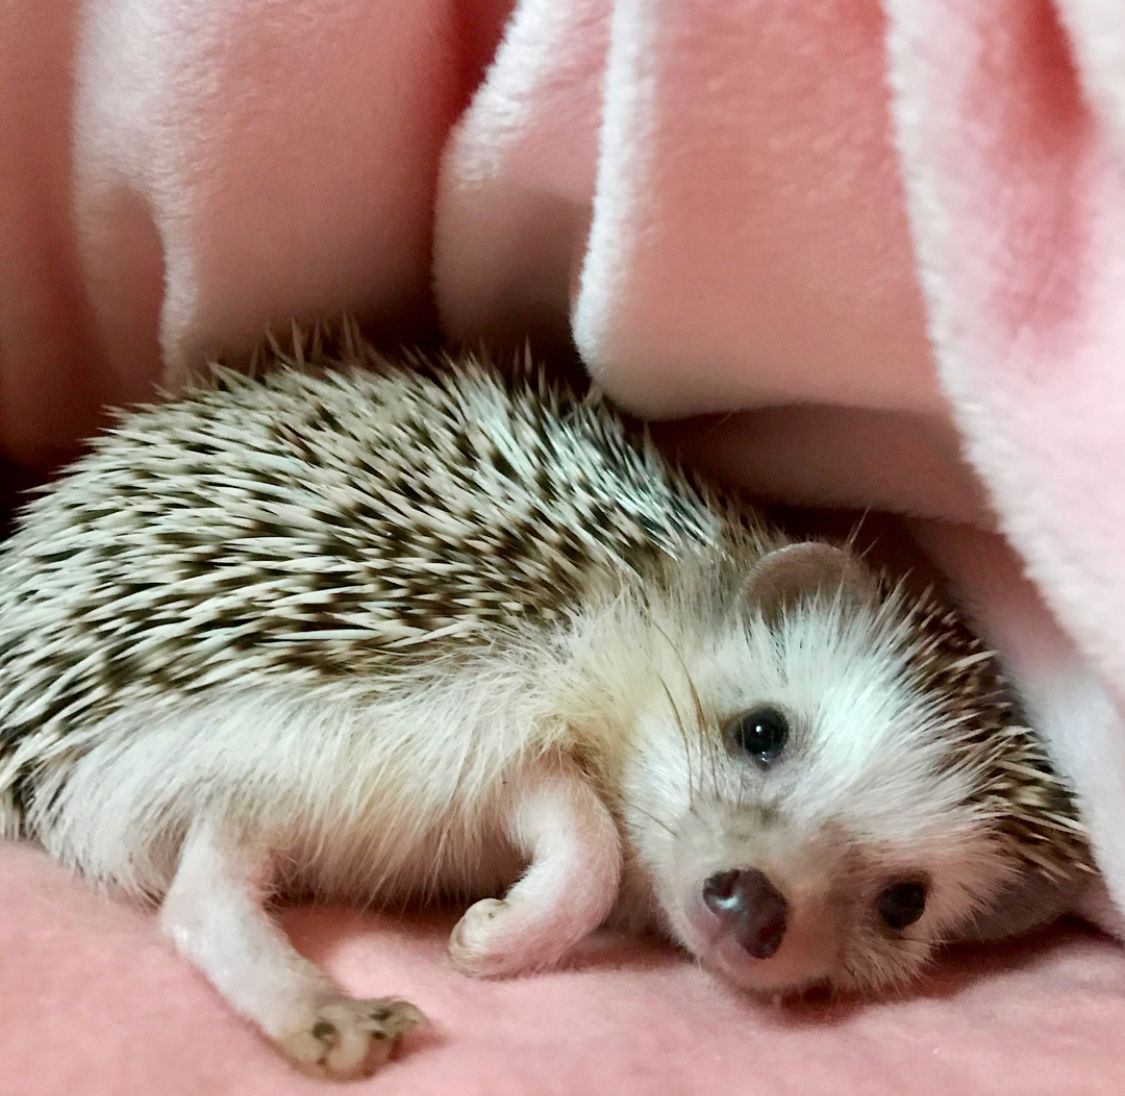

In [8]:
img = Image.open('ежик.jpg')#.resize(())
img

Преобразуйте картинку из объекта класса PIL в Numpy массив.

In [9]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [10]:
x.shape

(1096, 1125, 3)

Видно, что исходная цветная картинка содержит три канала - RGB. Преобразуем её в одноканальную либо с помощью специальной функции rgb2gray либо обычным усреднением по трём каналам.

In [11]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

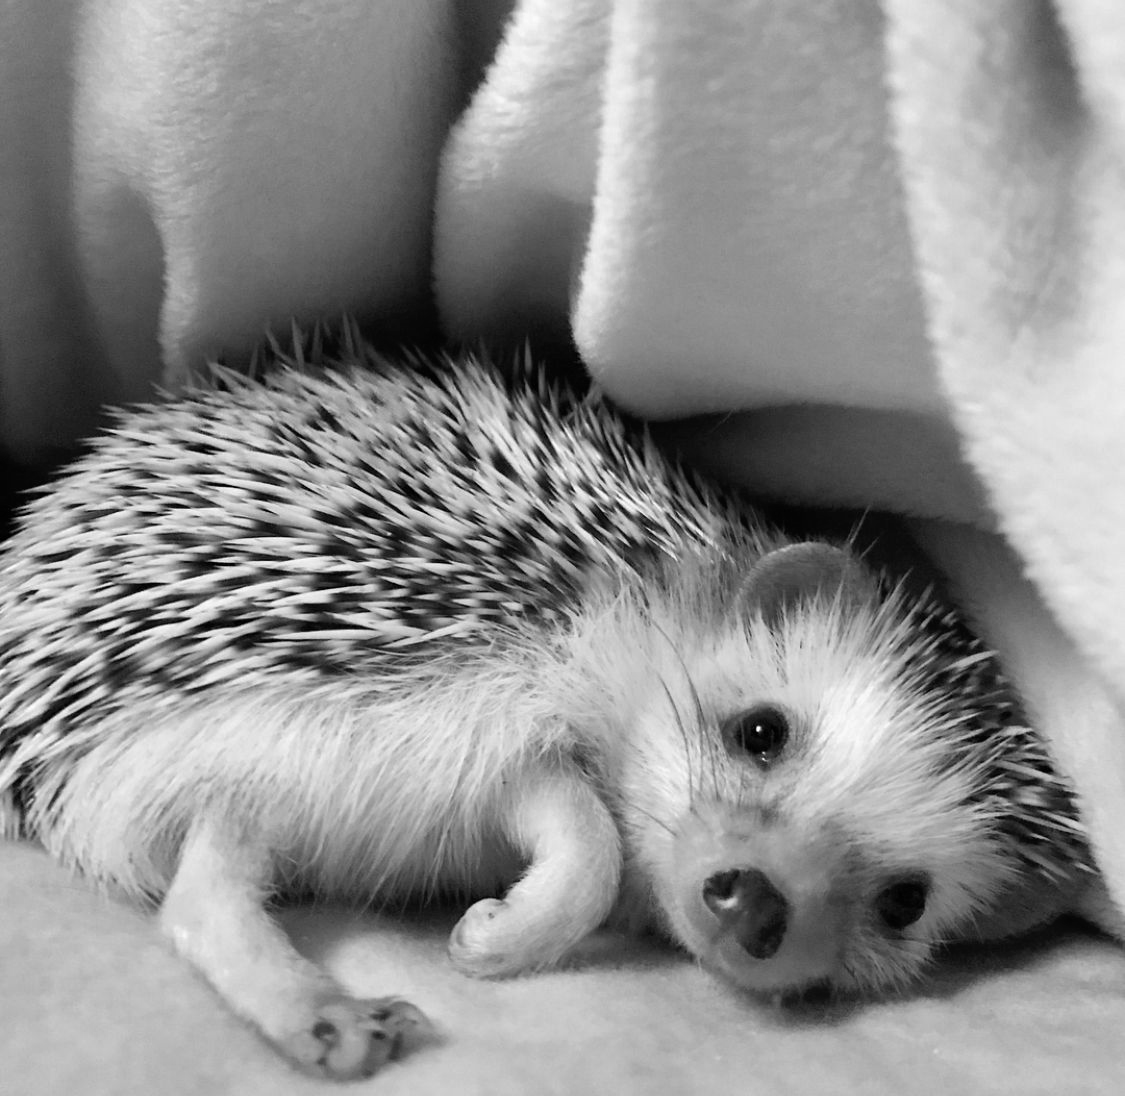

In [12]:
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

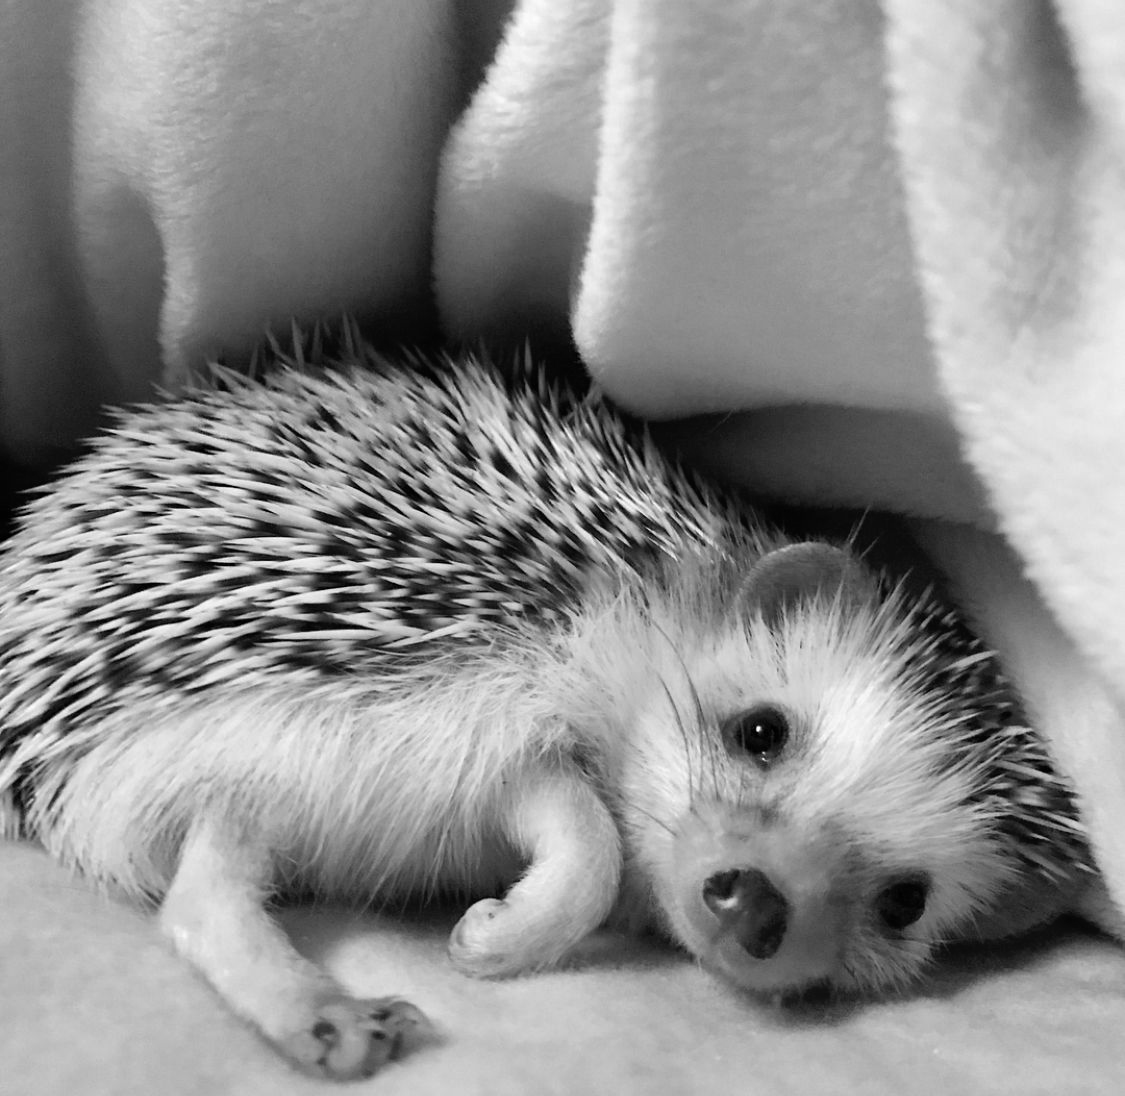

In [13]:
Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))

Дальше будем работать с одноканальной картинкой, т.е. двумерной матрицей.

In [14]:
#y = rgb2gray(x)
y = x.mean(axis=2)
y

array([[132.33333, 132.33333, 132.33333, ..., 227.     , 227.     ,
        226.     ],
       [133.33333, 133.33333, 133.33333, ..., 227.     , 227.     ,
        226.     ],
       [132.33333, 132.33333, 133.33333, ..., 228.     , 227.     ,
        227.     ],
       ...,
       [187.66667, 187.66667, 188.66667, ..., 189.66667, 189.66667,
        189.66667],
       [186.66667, 187.66667, 188.66667, ..., 189.66667, 189.66667,
        189.66667],
       [185.66667, 186.66667, 188.66667, ..., 188.66667, 187.66667,
        187.66667]], dtype=float32)

In [15]:
y.shape

(1096, 1125)

Сделаем SVD разложение

In [20]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [21]:
U.shape

(1096, 1096)

In [25]:
V.shape

(1096,)

Проверим что разложение корректное, соберём его обратно, перемножив матрицы

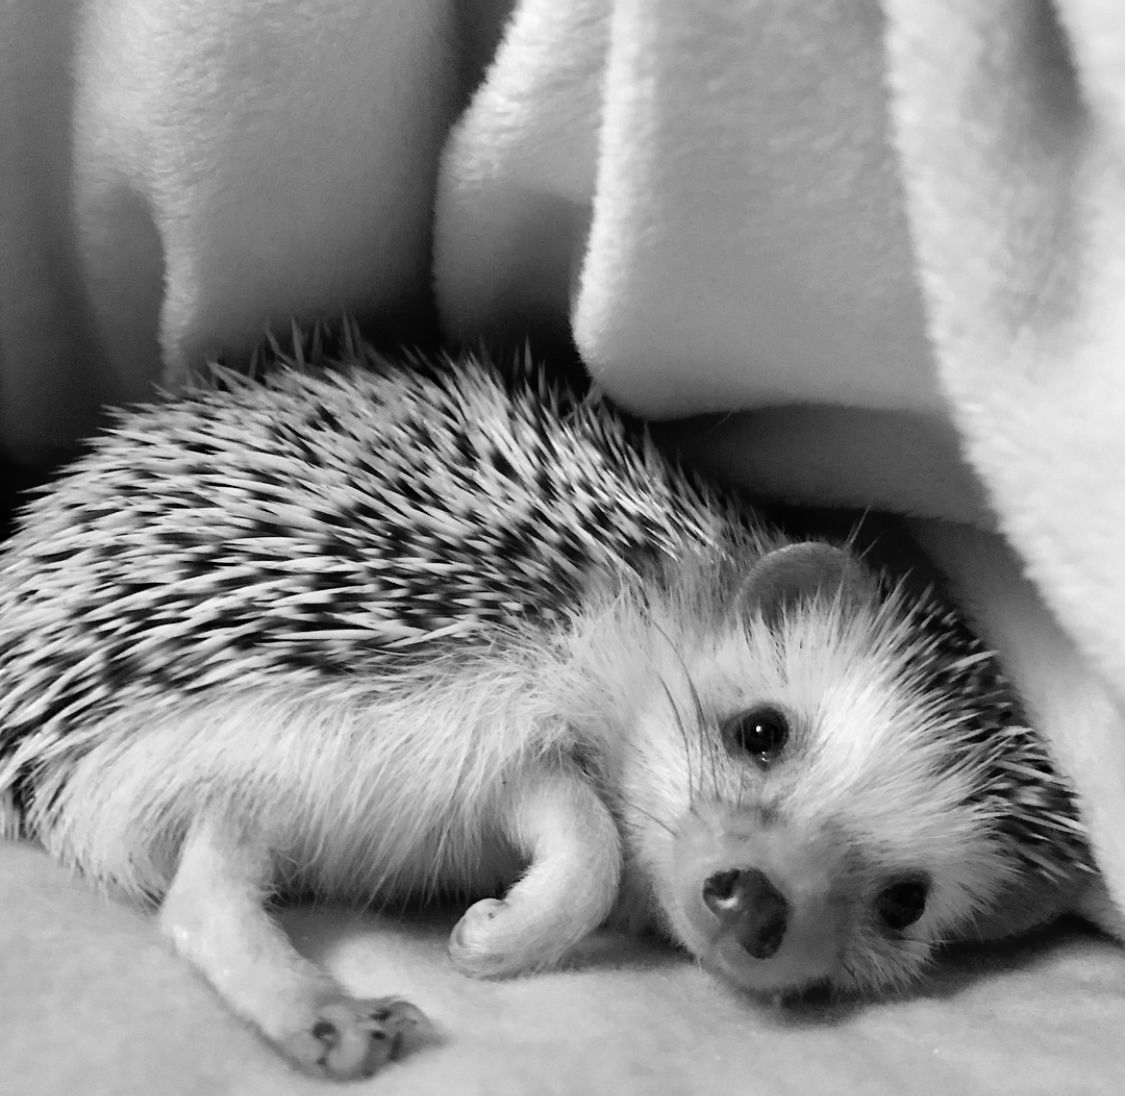

In [23]:
Y_full = U.dot(np.diag(S)).dot(V)
Image.fromarray(np.asarray(Y_full, dtype=np.uint8))

PIL объект можно при необходимости сохранить в файл на диск

In [24]:
Image.fromarray(np.asarray(Y_full, dtype=np.uint8)).save(f'full_rank.png')

**Задание для самостоятельной работы:**  
1. Рассмотреть малоранговые разложения
2. Получить картинки для разного значения ранга
3. Сохранить несколько картинок на диск
4. Сделать выводы

**Подсказки:**  
Не забудьте при преобразовании Numpy массива в объект PIL преобразовывать тип элементов в np.uint8.  
Если число находится вне диапазона [0, 255], сделайте клиппирование - все числа больше 255 приравняйте числу 255, все отрицательные числа сделайте равными нулю.

In [71]:
r_array = [1, 10, 50, 100, 200]
R, G, B = x[:,:,0], x[:,:,1], x[:,:,2]
R = np.linalg.svd(R, full_matrices=False)
G = np.linalg.svd(G, full_matrices=False)
B = np.linalg.svd(B, full_matrices=False)
for r in r_array:
    Y_not_full_R = R[0][:,:r].dot(np.diag(R[1][:r])).dot(R[2][:r,:])
    Y_not_full_R[Y_not_full_R > 255] = 255
    Y_not_full_R[Y_not_full_R < 0] = 0

    Y_not_full_G = G[0][:,:r].dot(np.diag(G[1][:r])).dot(G[2][:r,:])
    Y_not_full_G[Y_not_full_G > 255] = 255
    Y_not_full_G[Y_not_full_G < 0] = 0

    Y_not_full_B = B[0][:,:r].dot(np.diag(B[1][:r])).dot(B[2][:r,:])
    Y_not_full_B[Y_not_full_B > 255] = 255
    Y_not_full_B[Y_not_full_B < 0] = 0
    
    Y_not_full = np.dstack((Y_not_full_R, Y_not_full_G, Y_not_full_B))
    Image.fromarray(np.asarray(Y_not_full, dtype=np.uint8)).save(f'Ежик. rang={r}.png')

### При малом ранге картинка получается совсем не точная. При больших значениях (100 или 200) картинка похожа на исходную